In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### load

In [2]:
result_path = "../data/"
df = pd.read_csv(result_path+'results.csv')

classifiers = {'nb': 'Naive Bayes', 'svm': 'SVM', 
               'lr': 'Logistic regression', 'ff': 'Feedforward', 
               'Conv1D': 'Conv1D', 'LSTM': 'biLSTM'}

df["classifier name"] = df["classifier"].map(classifiers)
df

,classifier,feature,punctuation,dimension,normalization,acc,prec,rec,f1,classifier name
0,nb,nltk1gram,no punct,120k,count,0.847,0.848,0.847,0.847,Naive Bayes
1,nb,nltk1gram,no punct,120k,lenNorm,0.856,0.857,0.856,0.856,Naive Bayes
2,nb,nltk1gram,no punct,120k,tf,0.861,0.861,0.861,0.861,Naive Bayes
3,nb,nltk1gram,no punct,120k,tf-idf,0.866,0.866,0.866,0.866,Naive Bayes
4,nb,nltk1gram,no punct,20k,count,0.842,0.843,0.843,0.842,Naive Bayes
...,...,...,...,...,...,...,...,...,...,...
105,ff,sentiment score,NaN,1,both,0.734,0.736,0.734,0.733,Feedforward
106,ff,GloVeMean,punct,300,NaN,0.823,0.826,0.822,0.822,Feedforward
107,ff,GloVeMean+sentiment score,punct,301,NaN,0.829,0.832,0.828,0.828,Feedforward
108,Conv1D,GloVeSeq,punct,300,NaN,0.841,0.863,0.842,0.839,Conv1D


### plot function

In [10]:
def setFontSize():
  SMALL_SIZE = 14
  MEDIUM_SIZE = 16
  plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
  plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
  plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
  plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
  plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

setFontSize()

def plotClassifiers(title, data, x, y="f1", 
                    col="classifier name",
                    aspect=.6, height=6,
                    palette=sns.color_palette("Paired"),
                    rotateXticklabels=True):
  g = sns.catplot(data=data, x=x, y=y,
                  col=col,
                  kind='bar',
                  aspect=aspect, height=height,
                  palette=palette)
  (g.set_axis_labels("", "F1 score")
    .set_titles("{col_name}")
    .set(ylim=(0.0, 1)).despine(left=True))
  if rotateXticklabels:
    g.set_xticklabels(rotation=45, ha='right', rotation_mode='anchor')

  for ax in g.axes.ravel():
    for c in ax.containers:
      labels = [f'{(v.get_height()):.3f}' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

  g.fig.suptitle(title)
  plt.tight_layout()

### Does punctuations affect sentiment classification accuracy?

#### nltk1gram 20k

In [ ]:
df_nltk20k = df[(df.dimension == '20k') & (df.feature == 'nltk1gram') &
                (df.normalization.isin(['count', 'tf-idf']))]
df_nltk20k['x'] = df_nltk20k[['punctuation', 'normalization']].apply(", ".join, axis=1)
df_nltk20k.sort_values(by='normalization', inplace=True)
df_nltk20k

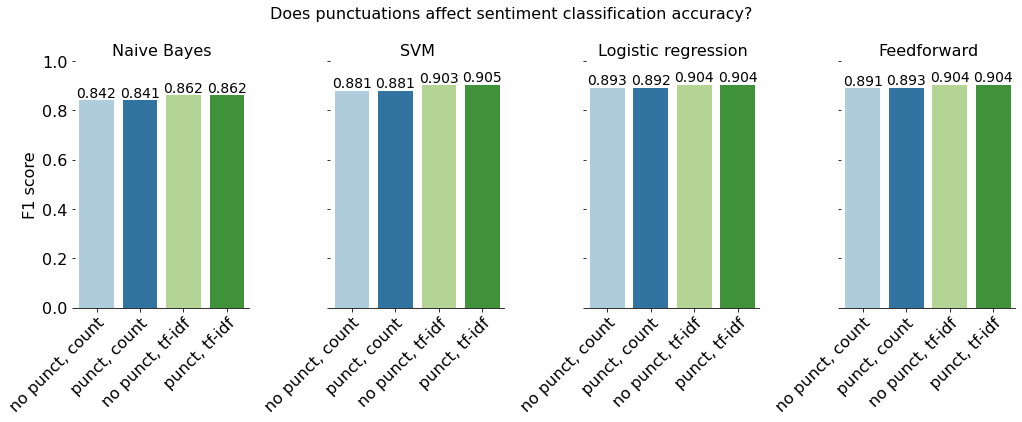

In [11]:
plotClassifiers(title='Does punctuations affect sentiment classification accuracy?',
                data=df_nltk20k, x=df_nltk20k.x, y="f1",
                col="classifier name")

Conclusion:
1. Unigram with and without punctuation achieve similar classification accuracy.
2. tf-idf weighting has slight advantage when used with ML classifiers, 
and it is more obvious with logistic regression, 
but not with a single layer feedforward neural net.

#### nltk1gram 120k
similar to nltk1gram 20k

In [ ]:
df_nltk120k = df[(df.dimension == '120k') & (df.feature == 'nltk1gram') &
                 (df.normalization.isin(['count', 'tf-idf']))]
df_nltk120k['x'] = df_nltk120k[['punctuation', 'normalization']].apply(", ".join, axis=1)
df_nltk120k.sort_values(by='normalization', inplace=True)

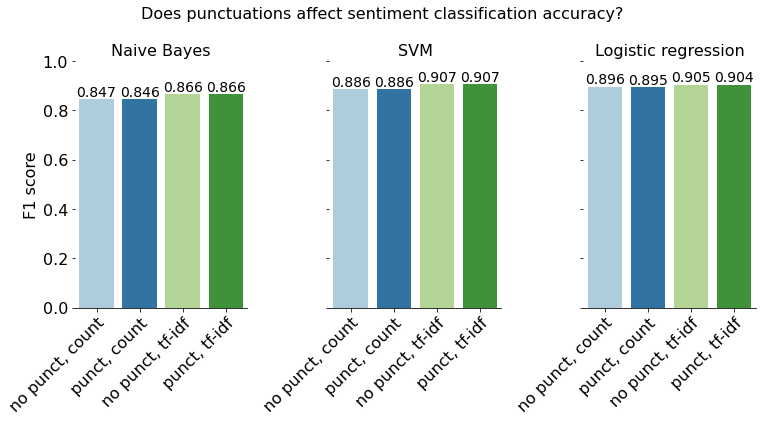

In [17]:
plotClassifiers(title='Does punctuations affect sentiment classification accuracy?',
                data=df_nltk120k, x=df_nltk120k.x, y="f1",
                col="classifier name")

#### keras1gram 20k
tf-idf worse than count
punctuation no effect, similar nltk

In [ ]:
df_keras1gram = df[(df.dimension == '20k') & (df.feature == 'keras1gram') &
                   ( df.normalization != 'multihot')]
df_keras1gram['x'] = df_keras1gram[['punctuation', 'normalization']].apply(", ".join, axis=1)
df_keras1gram.sort_values(by='normalization', inplace=True)

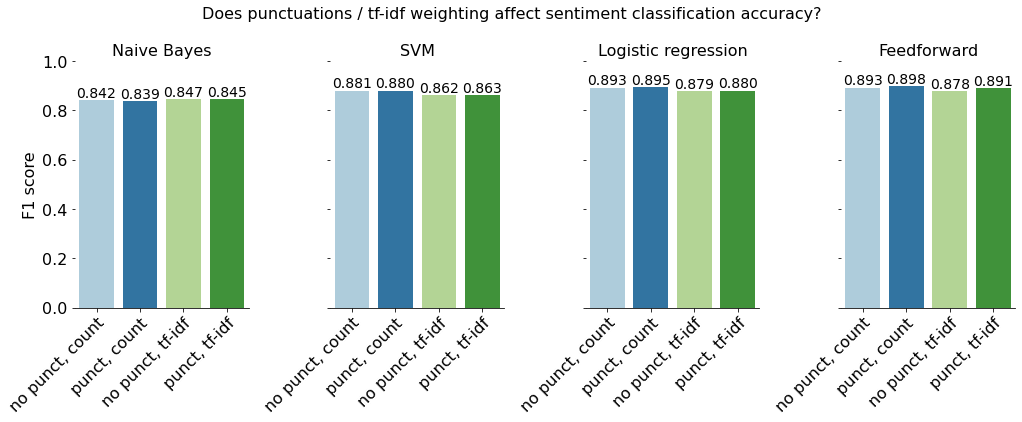

In [19]:
plotClassifiers(title='Does punctuations / tf-idf weighting affect sentiment classification accuracy?',
                data=df_keras1gram, x=df_keras1gram.x, y="f1",
                col="classifier name")

Conclusion: 
1. tf-idf weighting is inferior to count.
2. Punctuation has minimal effect on accuracy, similar to nltk unigram tokenization.

### Does reweighting scheme affect sentiment classification accuracy?

#### nltk1gram 20k

In [ ]:
df_nltk20k = df[(df.dimension == '20k') & (df.feature == 'nltk1gram') &
                (df.punctuation == 'punct')]
df_nltk20k['x'] = df_nltk20k['normalization'].str.replace('lenNorm', 'length\nnorm')

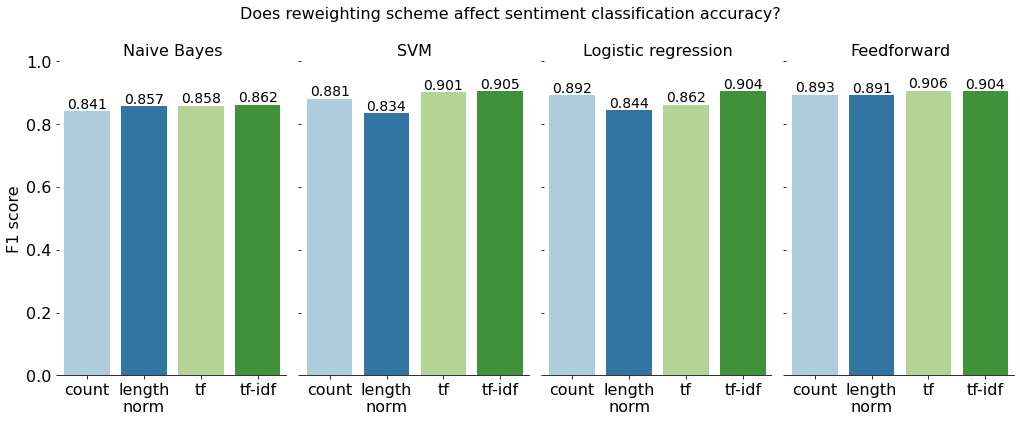

In [21]:
plotClassifiers(title='Does reweighting scheme affect sentiment classification accuracy?',
                data=df_nltk20k, x=df_nltk20k.x, y="f1",
                col="classifier name",
                rotateXticklabels=False)

Conclusion: tf-idf seems to perform more consistently well accross classifiers.

#### nltk1gram 120k

In [ ]:
df_nltk120k = df[(df.dimension == '120k') & (df.feature == 'nltk1gram') &
                (df.punctuation == 'punct')]
df_nltk120k['x'] = df_nltk120k['normalization'].str.replace('lenNorm', 'length\nnorm')

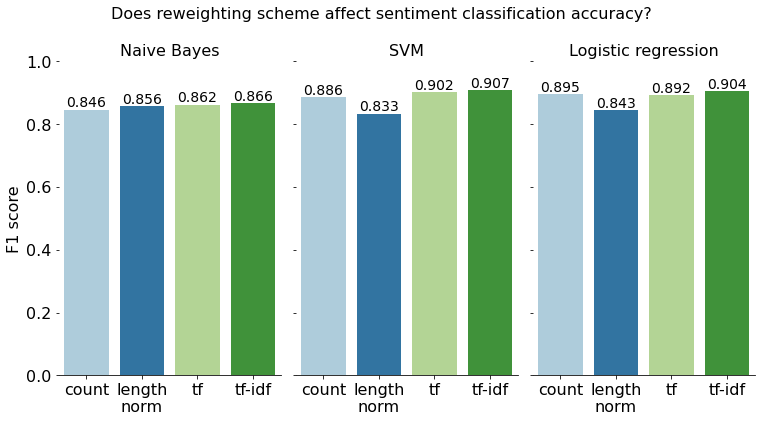

In [24]:
plotClassifiers(title='Does reweighting scheme affect sentiment classification accuracy?',
                data=df_nltk120k, x=df_nltk120k.x, y="f1",
                col="classifier name",
                rotateXticklabels=False)

### nltk vs. keras unigram tokenization

In [ ]:
df_1gram = df[(df.dimension == '20k') &
              (df.feature.isin(['keras1gram', 'nltk1gram'])) &
              (df.punctuation == 'punct') &
              ~(df.normalization.isin(['multihot']))]
df_1gram['tok'] = df.feature.str.slice(stop=-5)
df_1gram['x'] = df_1gram[['tok', 'normalization']].astype(str).apply(", ".join, axis=1)

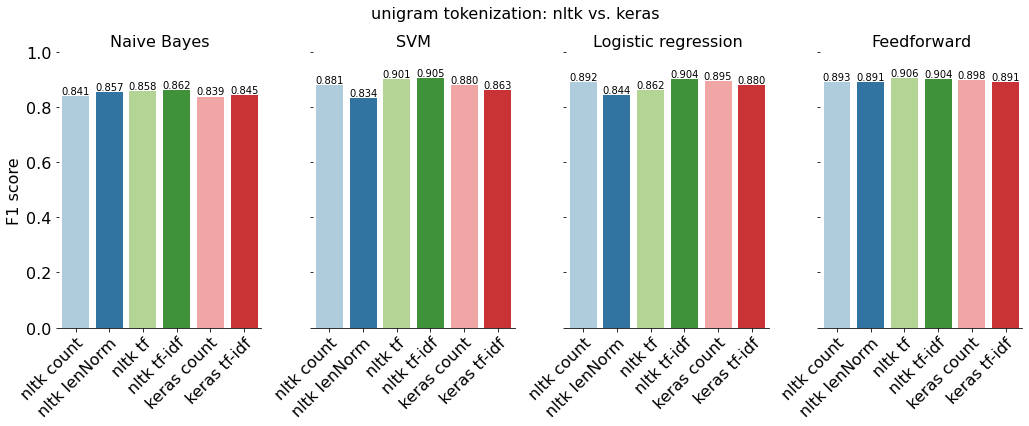

In [41]:
plt.rc('font', size=10)  
plotClassifiers(title='unigram tokenization: nltk vs. keras',
                data=df_1gram, x=df_1gram.x, y="f1",
                col="classifier name")
setFontSize()

In [ ]:
df_1gram = df[(df.dimension == '20k') &
              (df.feature.isin(['keras1gram', 'nltk1gram'])) &
              (df.punctuation == 'punct') &
              ~(df.normalization.isin(['multihot']))]
df_1gram['tok'] = df.feature.str.slice(stop=-5)
df_1gram['x'] = df_1gram[['tok', 'normalization']].astype(str).apply(" ".join, axis=1)

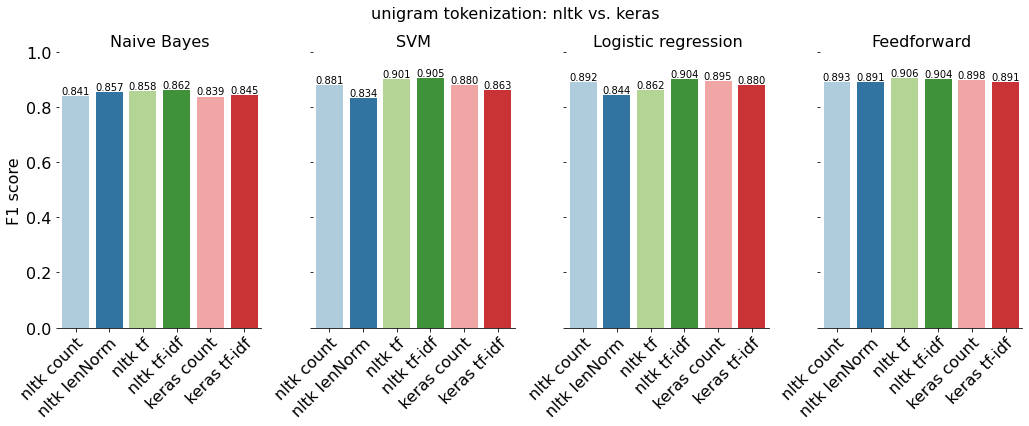

In [42]:
plt.rc('font', size=10)  
plotClassifiers(title='unigram tokenization: nltk vs. keras',
                data=df_1gram, x=df_1gram.x, y="f1",
                col="classifier name")
setFontSize()

Conclusion: nltk unigram tokenization is generally better than keras tokenization.

### unigram vs. bigram tokenization

In [ ]:
df_ngram = df[~(df.normalization.isin(['multihot'])) & 
              (df.normalization == 'count') & 
              (
              (df.feature == 'keras2gram') |
              ((df.feature == 'keras1gram') )
              )]
df_ngram['tok'] = df.feature.str.slice(start=-5)
df_ngram['x'] = df_ngram[['tok', 'punctuation']].astype(str).apply(" ".join, axis=1)

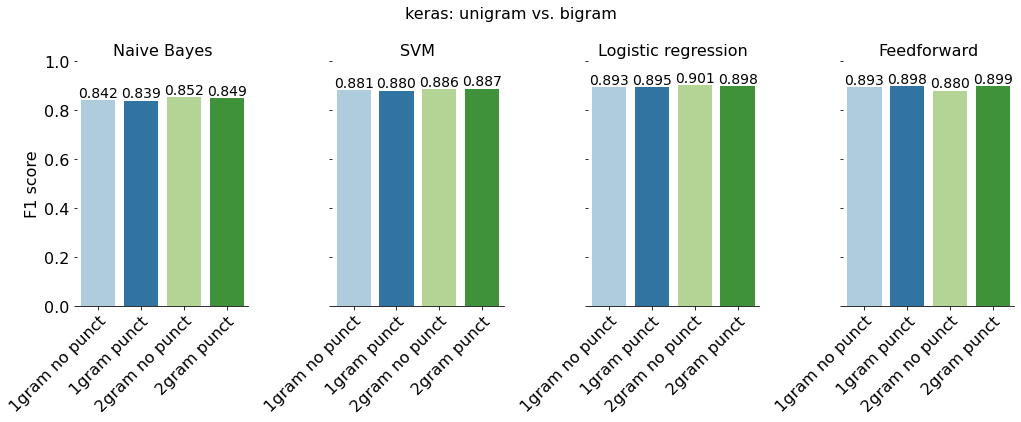

In [30]:
plotClassifiers(title='keras: unigram vs. bigram',
                data=df_ngram, x=df_ngram.x, y="f1",
                col="classifier name")

### Does feature dimension affect sentiment classification accuracy?

In [ ]:
df_dim = df[~(df.feature.isin(['keras1gram', 'keras2gram', 'GloVeSeq'])) &
            ~(df.normalization.isin(['count', 'norm', 'lenNorm', 'tf'])) &
            ~(df.punctuation.isin(['no punct'])) &
            ~(df.classifier.isin(['median']))]
df_dim['x'] = df_dim[['feature', 'dimension']].apply(" ".join, axis=1)

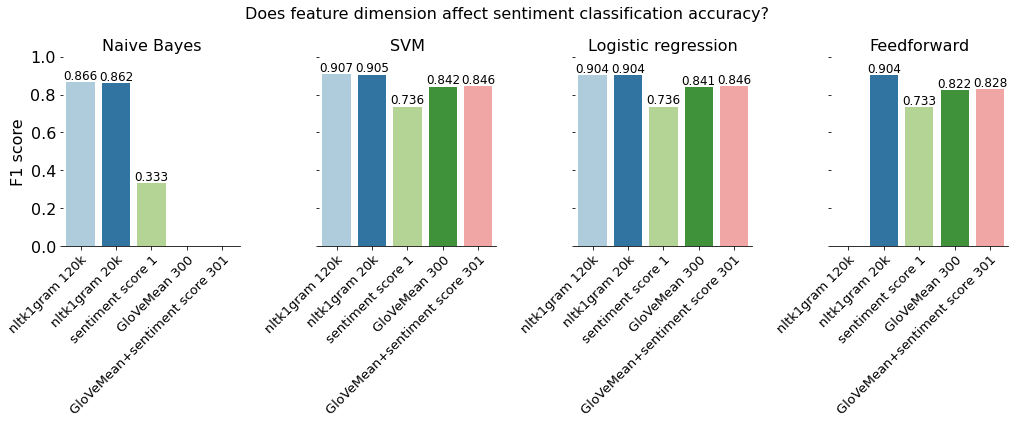

In [32]:
plt.rc('font', size=12)
plt.rc('xtick', labelsize=13)
plotClassifiers(title='Does feature dimension affect sentiment classification accuracy?',
                data=df_dim, x=df_dim.x, y="f1",
                col="classifier name")
setFontSize()

### Does DL models have advantage over traditional ML models?

In [ ]:
df_dl = df[~(df.feature.isin(['keras2gram', 'keras1gram', 'GloVeSeq'])) & #
            ~(df.normalization.isin(['count', 'norm', 'multihot', 'tf', 'lenNorm'])) &
            ~(df.dimension.isin(['120k'])) &
            ~(df.punctuation.isin(['no punct'])) &
            ~(df.classifier.isin(['median']))]
df_dl['x'] = df_dl[['feature']].astype(str).apply(" ".join, axis=1)

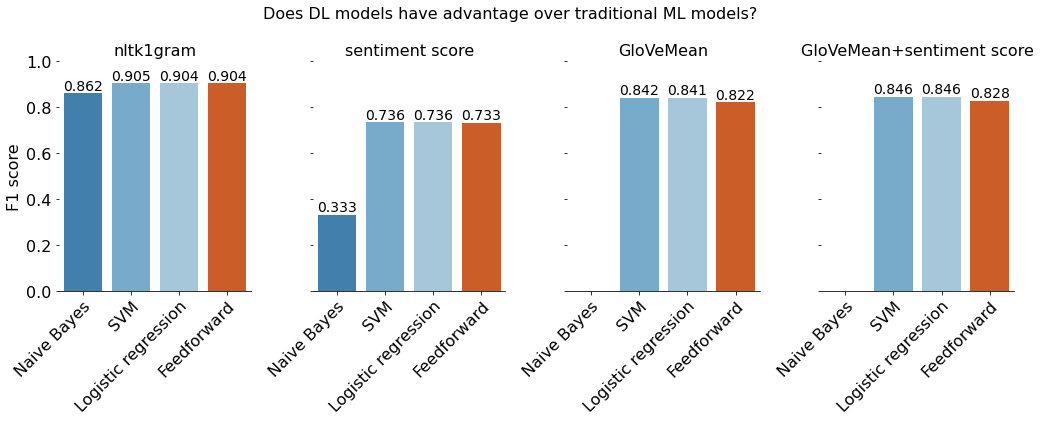

In [35]:
colors = sns.color_palette('tab20c')[:3]
colors += sns.color_palette('tab20c')[4:]

plotClassifiers(title='Does DL models have advantage over traditional ML models?',
                data=df_dl, y="f1",
                x=df_dl["classifier name"], 
                col='x',
                palette=colors)

### Better use of GloVe?

In [ ]:
idx = df.groupby(['classifier'], sort=False)['f1'].idxmax()

df_glove = df[(df.classifier != 'median') & ~(df.f1.isna()) &
              (
              (df.feature.isin(['GloVeMean', 'GloVeMean+sentiment ', 'GloVeSeq'])) |
              (df.index.isin(idx.to_list()))
              )
              ]
df_glove['x'] = df_glove[['classifier name', 'feature']].astype(str).apply("\n".join, axis=1)
df_glove.sort_values(by='dimension', ascending=True, inplace=True)

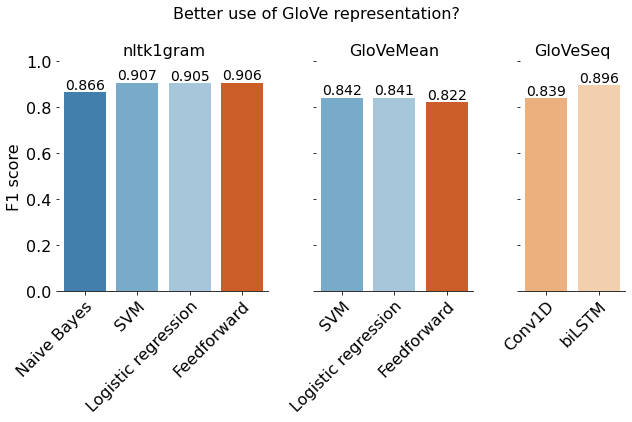

In [37]:
f, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9,6), gridspec_kw={'width_ratios': [4,3,2]})
sns.barplot(data=df_glove[:4], 
            x=df_glove['classifier name'][:4], y="f1",
            ax=ax[0],
            palette=colors)
sns.barplot(data=df_glove[4:-2], 
            x=df_glove['classifier name'][4:-2], y="f1",
            ax=ax[1],
            palette=colors[1:])
sns.barplot(data=df_glove[-2:], 
            x=df_glove['classifier name'][-2:], y="f1",
            ax=ax[2],
            palette=colors[5:])     

for x,phi in zip(ax, df_glove.feature.unique()):
  x.set(xlabel="", ylabel="")
  x.spines[['top', 'right', 'left']].set_visible(False)
  x.set_xticklabels(x.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
  x.set_title(phi)
  for i in x.containers:
      x.bar_label(i,)
ax[0].set(ylabel="F1 score", ylim=(0.0, 1))
f.suptitle('Better use of GloVe representation?')
plt.tight_layout()